# Task 4.9

## Part 2

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#Importing dataframes
path = r'C:\Users\alext\Desktop\Career Foundry\Programming\Instacart Basket Analysis'

In [6]:
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged_49.pkl'))

## 1 - Create a new notebook, import the necessary analysis and vizualization libraries and your most up-to-date project data

In [7]:
df_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


***Checking column size and columns

In [8]:
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   order_dow              int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  _merge                 category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  busiest_days           object  
 18  busiest_period_of_day  object  
 19  max_order              int64   
 20  loyalty_flag           object  
 21  mean_price             float6

In [9]:
df_cust_merge.shape

(32404859, 34)

## 2 - Create a bar chart, a histogram, a scatterplot, and a line chart using a sample subset for the line chart

### Bar Chart

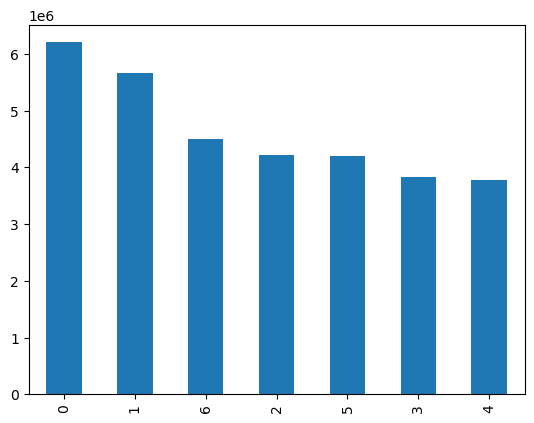

In [10]:
#Bar chart 1
bar_1 = df_cust_merge['order_dow'].value_counts().plot.bar()

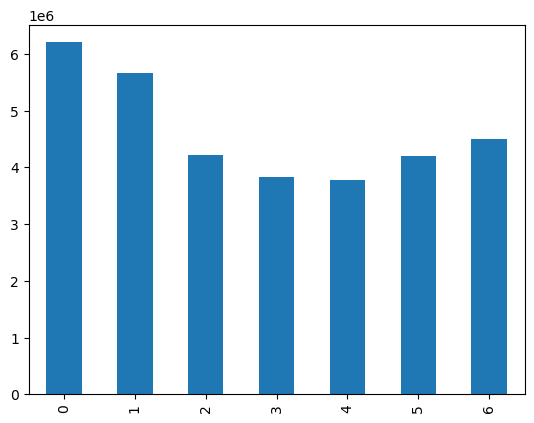

In [11]:
#Re-ordering the x-axis 
bar_2 = df_cust_merge['order_dow'].value_counts().sort_index().plot.bar()

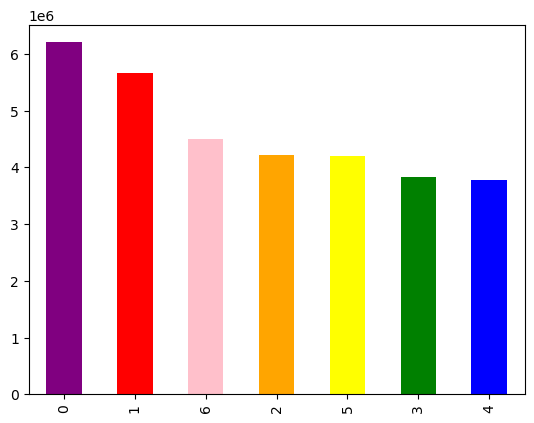

In [12]:
#Changing color of the bar chart
bar_3 = df_cust_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Histogram

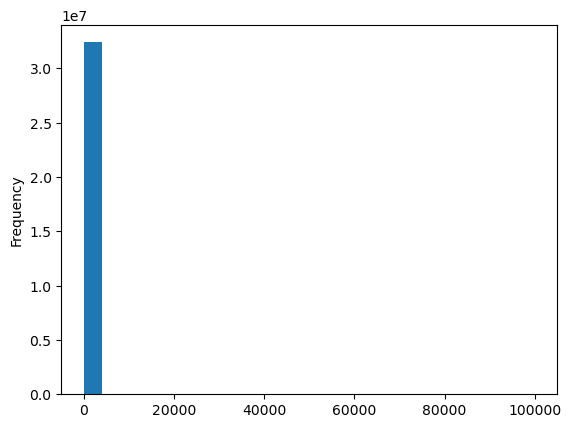

In [12]:
hist_1 = df_cust_merge['prices'].plot.hist(bins = 25)

In [13]:
df_cust_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
df_cust_merge['prices'].mean()

11.980225638383438

In [15]:
df_cust_merge['prices'].median()

7.4

In [16]:
df_cust_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

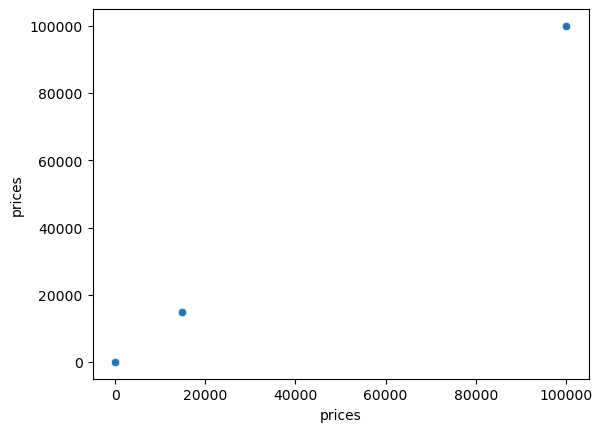

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

In [19]:
df_cust_merge[df_cust_merge['prices'] > 100]

MemoryError: Unable to allocate 3.38 GiB for an array with shape (14, 32404859) and data type int64

In [32]:
df_cust_merge.loc[df_cust_merge['prices'] >100, 'prices'] = np.nan

In [33]:
df_cust_merge['prices'].max()

25.0

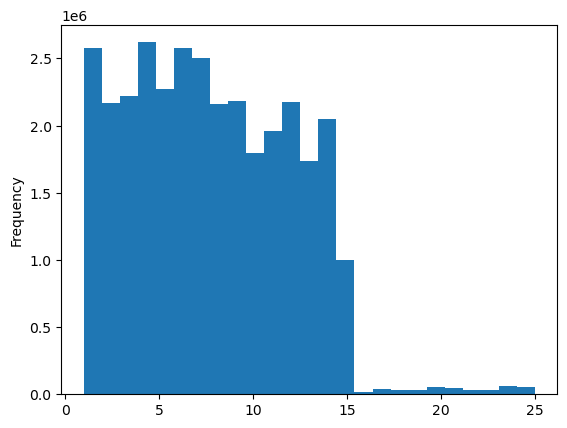

In [35]:
hist = df_cust_merge['prices'].plot.hist(bins = 25)

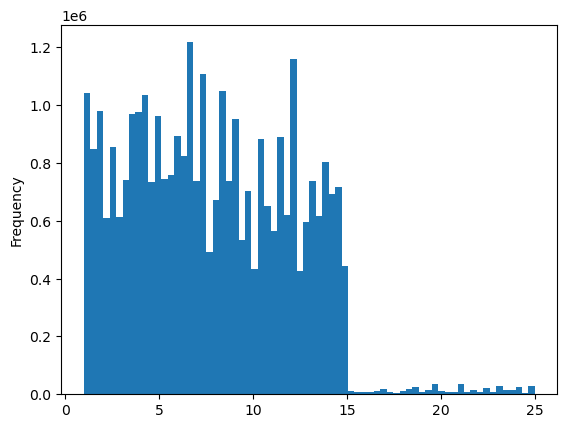

In [36]:
#Increasing bin size
hist_2 = df_cust_merge['prices'].plot.hist(bins = 70)

### Scatterplot

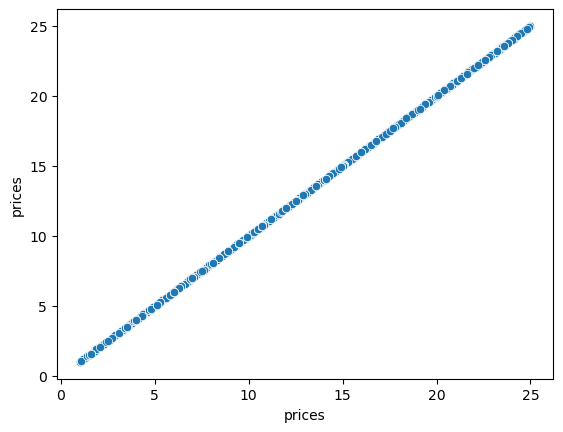

In [37]:
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

In [38]:
np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [39]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [40]:
dev.shape

(32404859,)

In [41]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

***Dividing df into two different samples

In [42]:
big = df_cust_merge[dev]
small = df_cust_merge[~dev]

In [43]:
len(big) + len(small)

32404859

In [46]:
df_2 = small[['order_dow','prices']]

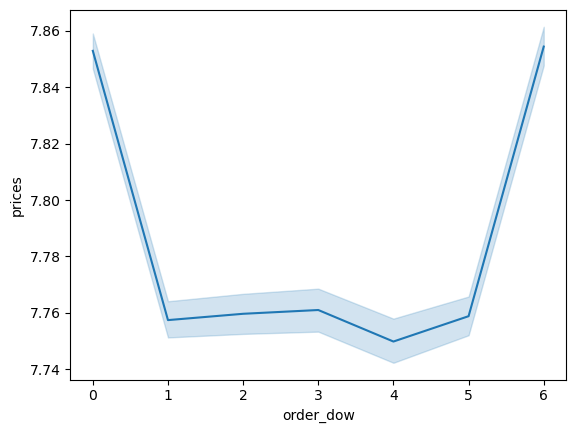

In [47]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

## 3 - Create a hisofram of the "order_hour_of_day" column

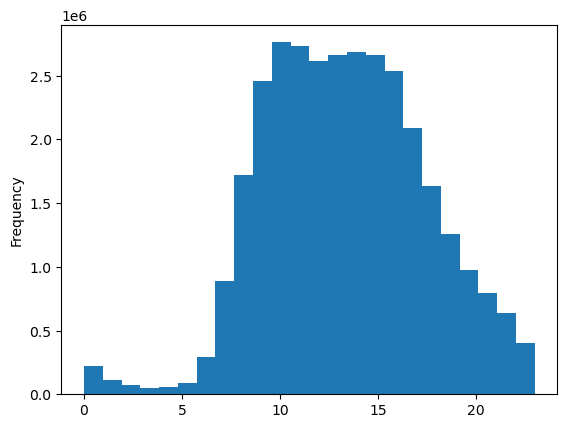

In [48]:
hist_3 = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

### Observation - the histogram above visualizes the frequency of customers in a day. The highest frequency hours are around 9-16, the lowest frequencies are between 0-7, the frequency ticks up around 7-9 then valleys around 16-23. 

In [70]:
df_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,_merge,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 4 - Create a bar chart from the "loyalty_flag" column

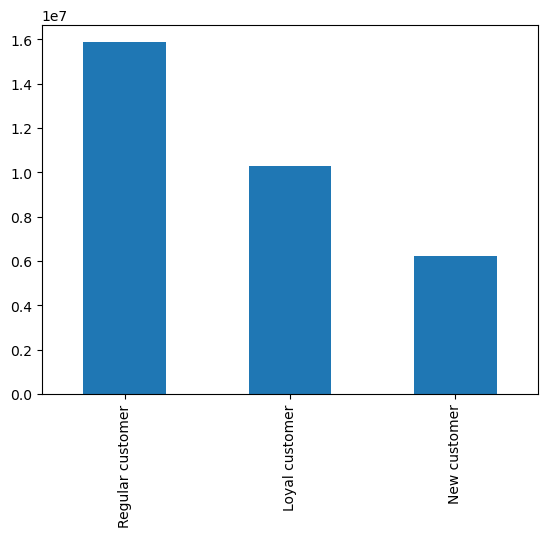

In [20]:
bar_4 = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

## 5 - Check whether there's a difference in expenditure (the "prices" column) depending on the hour of the day. 

In [50]:
df_line = small[['order_hour_of_day', 'prices']]

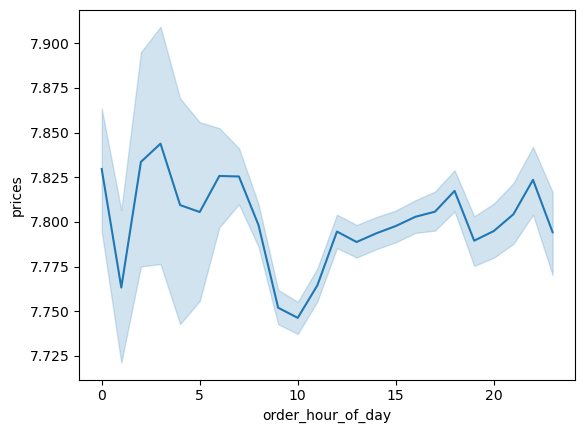

In [51]:
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

## 6 - Conduct exploratory analysis of customer demographics to inform the targeted marketing campaigns by determining whether there's a connection between age and family situation by creating a line chart exploring the connection between age and number of dependents

In [52]:
df_line_2 = small[['Age', 'n_dependants']]

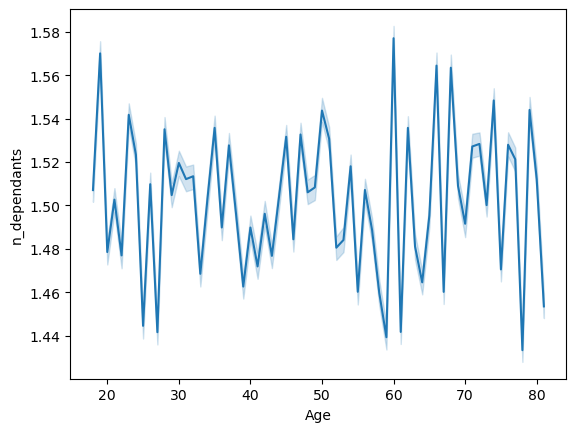

In [53]:
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')

### Observation - there is not enough sufficient evidence to suggest that age and number of dependants are correlated or connected. There are peaks and valleys throughout late teens, 20s and 30s. Once we reach the age of 40s there is a slightly steady increase since parents are dependants at this point in time that has an affect on shopping. Then lastly, the highest spike occurs around age 60, which is typically during a parents' retirement age, at which point the dependents would be more independent also dictating the spending decisions. 

## 7 - Explore whether there's a connection between age and spending power (income) by creating a scatterplot using the "sns.scatterplot()" function. 

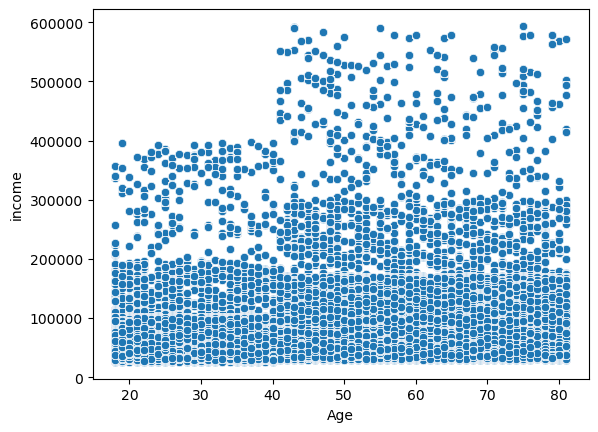

In [54]:
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = df_cust_merge)

### Observation - Looking at the density of the data points on the scatterplot it is instantly visible that the average person makes under 200k a year. Before the age of 40, no one is making above 400k. However, after the ge of 40 up untill 80, people begin to make a maximum of 600k. Another insight is that after the age of 40 there is a higher density of individuals making an income between 200-300k. This could be attributed to age and the amount of time or experience it takes to be promoted to a role that pays a higher income. 

## 8 - Export visualizations as ".png" files in the project folder 

***bar charts

In [55]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [56]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [57]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

In [21]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_.png'))

***histograms

In [58]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices_25.png'))

In [59]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices_70.png'))

***scatterplot

In [60]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

***line chart

In [61]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_price_dow.png'))

***histogram of the order_hour_of_day

In [62]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hod.png'))

***bar chart of the loyalty frequency

***line chart of the expenditure between prices and hour of the day

In [64]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_price_hod.png'))

***line chart of the correlation between age and the number of dependents 

In [65]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_age_dep.png'))

***scatterplot of the correlation between age and spending 

In [66]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))